In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_Train=pd.read_csv("Logistic_X_Train.csv")
Y_Train=pd.read_csv("Logistic_Y_Train.csv")
X_Test=pd.read_csv("Logistic_X_Test.csv")
sample=pd.read_csv("SampleOutput.csv")

In [3]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(sample.shape)

(2250, 2)
(2250, 1)
(750, 2)
(2250, 1)


In [99]:
print(sample)

      label
0         0
1         0
2         1
3         0
4         1
5         0
6         0
7         0
8         0
9         1
10        0
11        1
12        1
13        0
14        1
15        0
16        1
17        0
18        1
19        1
20        1
21        0
22        0
23        1
24        0
25        1
26        0
27        0
28        0
29        1
...     ...
2220      0
2221      0
2222      1
2223      1
2224      1
2225      0
2226      1
2227      0
2228      1
2229      0
2230      1
2231      1
2232      1
2233      1
2234      1
2235      1
2236      0
2237      1
2238      0
2239      0
2240      0
2241      0
2242      1
2243      0
2244      0
2245      1
2246      1
2247      1
2248      1
2249      0

[2250 rows x 1 columns]


In [5]:
def softmax(a):
    e_pa=np.exp(a) #vector
    #print(e_pa)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [16]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={} #Dictionary to hold all parameters
        # 1st layer
        model['w1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0])) # row vector
        
        # 2nd layer
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1])) # row vector
        
        # 3rd layer/ output layer
        model['w3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size)) # row vector
        
        self.model=model
        self.activation_outputs=None
        
    def forward(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1) # activation function is tan inverse (output in range -1 to 1) in place of sigmoid function
        
        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
        
        #Saving activation results from different layers
        self.activation_outputs=(a1,a2,y_) #tuple
        return y_ # y_(y^) is the final ouput
    
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        m=x.shape[0]
        # y_ will be of dimension mXc where every example mi will be provided with the probability of belonging
        #  to the each class. The class with highest probability will denote the predicted classs for that example
        
        a1,a2,y_=self.activation_outputs
        
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)# change in weights
        db3=np.sum(delta3,axis=0)/float(m)# chnage in bias
        
        
        # derivative of tan^-1 x is 1-(tan^-1 x)^2 (Its approx value Not Correct Real Value is (1/1+x^2))
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)# change in weights
        db2=np.sum(delta2,axis=0)# chnage in bias
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)# change in weights
        db1=np.sum(delta1,axis=0)# chnage in bias
        
        # Update the Model Parameters Using Gradient Descent
        self.model['w1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['w2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        
        self.model['w3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
        
    def summary(self):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_=self.activation_outputs
            
        #print the shape of every paramter
        print("W1",w1.shape)
        print("A1",a1.shape)
            
        print("W2",w2.shape)
        print("A2",a2.shape)
            
        print("W3",w3.shape)
        print("Y_",y_.shape)

In [7]:
#Categorical Cross Function y_ohv is one hot vectors
def loss(y_ohv,p):
        l=-np.mean(y_ohv*np.log(p))
        return l

In [8]:
def one_hot(y,depth):
    m=y.shape[0]
    # depth is nothing but no of classes
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [59]:
# 10 neuron in first layer and 5 neurons in second layer and input features are  2 and ouptut classes are 2.
model  = NeuralNetwork(input_size=2,layers=[4,2],output_size=2)

In [10]:
Xtrain=np.array(X_Train)
Ytrain=np.array(Y_Train)
Xtest=np.array(X_Test)

In [11]:
print(Ytrain.shape)
Ytrain=Ytrain.reshape(Ytrain.shape[0],)

(2250, 1)


In [12]:
print(Xtrain.shape)
print(Ytrain.shape)

(2250, 2)
(2250,)


In [19]:
predict=model.forward(Xtrain)

In [60]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [61]:
losses = train(Xtrain,Ytrain,model,500,0.001)

Epoch 0 Loss 0.7586
Epoch 1 Loss 0.2590
Epoch 2 Loss 0.1991
Epoch 3 Loss 0.2077
Epoch 4 Loss 0.3107
Epoch 5 Loss 0.1870
Epoch 6 Loss 0.1666
Epoch 7 Loss 0.1602
Epoch 8 Loss 0.1570
Epoch 9 Loss 0.1551
Epoch 10 Loss 0.1539
Epoch 11 Loss 0.1542
Epoch 12 Loss 0.1595
Epoch 13 Loss 0.1917
Epoch 14 Loss 0.1948
Epoch 15 Loss 0.2485
Epoch 16 Loss 0.1612
Epoch 17 Loss 0.1546
Epoch 18 Loss 0.1512
Epoch 19 Loss 0.1486
Epoch 20 Loss 0.1464
Epoch 21 Loss 0.1443
Epoch 22 Loss 0.1436
Epoch 23 Loss 0.1461
Epoch 24 Loss 0.1666
Epoch 25 Loss 0.1806
Epoch 26 Loss 0.2451
Epoch 27 Loss 0.1469
Epoch 28 Loss 0.1411
Epoch 29 Loss 0.1368
Epoch 30 Loss 0.1365
Epoch 31 Loss 0.1371
Epoch 32 Loss 0.1512
Epoch 33 Loss 0.1548
Epoch 34 Loss 0.1964
Epoch 35 Loss 0.1489
Epoch 36 Loss 0.1520
Epoch 37 Loss 0.1347
Epoch 38 Loss 0.1399
Epoch 39 Loss 0.1347
Epoch 40 Loss 0.1500
Epoch 41 Loss 0.1410
Epoch 42 Loss 0.1570
Epoch 43 Loss 0.1371
Epoch 44 Loss 0.1408
Epoch 45 Loss 0.1274
Epoch 46 Loss 0.1328
Epoch 47 Loss 0.1268
Ep

In [70]:
model.forward(Xtrain[0])

array([[0.99663813, 0.00336187]])

In [74]:
print(model.predict(Xtrain[212]))

[1]


In [65]:
t=(1-np.square(a2))
print(t.shape)

(2250, 2)


In [66]:
w3=np.random.randn(2,1)

In [67]:
print(w3)

[[-2.55298982]
 [ 0.6536186 ]]


In [75]:
#outputs=model.predict(Xtrain)

In [77]:
#print(outputs.shape)

(2250,)


In [79]:
print(Xtest.shape)

(750, 2)


In [81]:
outputs=model.predict(Xtest)
print(outputs.shape)

(750,)


In [95]:
df=pd.DataFrame(data=outputs,columns=['label'])

In [96]:
df.to_csv("answer.csv",index=False)

In [97]:
answer=pd.read_csv("answer.csv")

In [100]:
print(answer.columns)

Index(['label'], dtype='object')


In [101]:
# You can get this code from internet
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

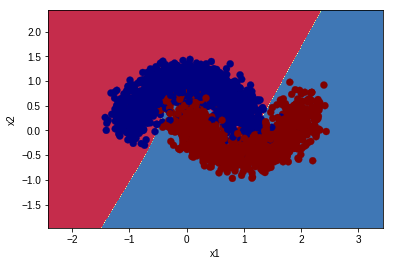

In [102]:
plot_decision_boundary(lambda x:model.predict(x),Xtrain,Ytrain) # Figure for training data 

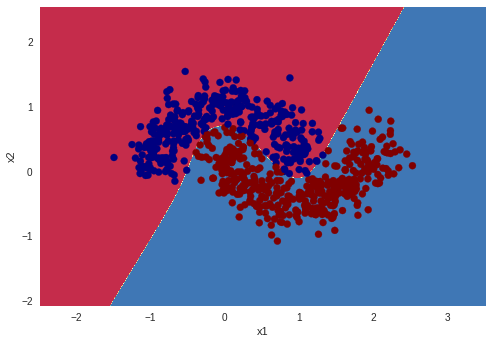

In [104]:
plot_decision_boundary(lambda x:model.predict(x),Xtest,outputs) # figure for testing data